In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # 데이터 시각화 도구 --> plot으로 연산.
tf.enable_eager_execution() #tensorflow를 그래프없이 연산을 가능하게함

In [48]:
x_data = [1.,2.,3.,4.,5.] # learning data
y_data = [1.,2.,3.,4.,5.] # learning data

#y_data = [6.,7.,8.,9.,10.] # real data

W = tf.Variable(2.9)
b = tf.Variable(1.0)

H = W * x_data + b
cost = tf.reduce_mean(tf.square(H - y_data)) 
#배열 = 행렬

In [44]:
W.numpy()

2.9

In [37]:
b.numpy()

1.0

In [38]:
H.numpy()

array([ 3.9     ,  6.8     ,  9.700001, 12.6     , 15.5     ],
      dtype=float32)

In [39]:
cost.numpy()

52.110004

    0|    2.4220|    0.8660| 52.110004
   10|    0.9863|    0.4526|  0.268136
   20|    0.8935|    0.4117|  0.031833
   30|    0.8907|    0.3963|  0.028760
   40|    0.8940|    0.3829|  0.026872
   50|    0.8975|    0.3702|  0.025112
   60|    0.9009|    0.3579|  0.023468
   70|    0.9042|    0.3459|  0.021931
   80|    0.9074|    0.3344|  0.020495
   90|    0.9105|    0.3233|  0.019152
  100|    0.9134|    0.3125|  0.017898


(0, 10)

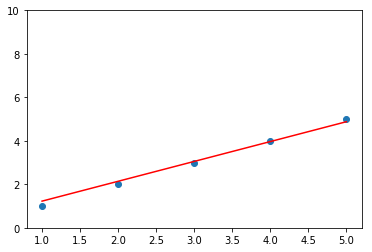

In [40]:
learning_rate = 0.01
for i in range(101):
    with tf.GradientTape() as tape: #Tape -> 실행된 연산을 테이프에 저장.
        H = W * x_data + b
        cost = tf.reduce_mean(tf.square(H - y_data))
    W_grad, b_grad = tape.gradient(cost,[W,b]) #cost식에 대해 W와 b에 대해 미분을 시행.
    W.assign_sub(learning_rate*W_grad) #gradient descent방식사용.
    b.assign_sub(learning_rate*b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
plt.plot(x_data,y_data,'o') 
#각 배열을 (x,y)으로 맵핑시켜 그래프를 만듬, 두번째 default parameter : 1부터 시작해사 tick 1씩 증가되도록 함 
plt.plot(x_data,H,'r-') # 3번째 parameter는 점 or line을 선택
plt.ylim(0,10)

    0|    2.8996|    1.0004| 52.110004
   10|    2.8954|    1.0046| 51.966454
   20|    2.8912|    1.0088| 51.823444
   30|    2.8871|    1.0129| 51.680939
   40|    2.8829|    1.0171| 51.538952
   50|    2.8788|    1.0212| 51.397503
   60|    2.8747|    1.0253| 51.256542
   70|    2.8705|    1.0295| 51.116119
   80|    2.8664|    1.0336| 50.976196
   90|    2.8623|    1.0377| 50.836792
  100|    2.8582|    1.0418| 50.697895


(0, 10)

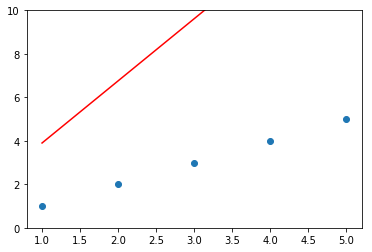

In [50]:
#tape 안쓰고

import itertools as it
learning_rate = 0.01
for i in range(101):
    H = W * x_data + b
    cost = tf.reduce_mean(tf.square(H - y_data))
    s = 0.
    s = tf.reduce_mean((W * x_data - y_data) * x_data) # error generate
    W_grad = learning_rate / (len(x_data)) * s 
    b_grad = -1 * learning_rate / (len(x_data)) * s 
    W.assign_sub(learning_rate*W_grad) #gradient descent방식사용.
    b.assign_sub(learning_rate*b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
plt.plot(x_data,y_data,'o') 
#각 배열을 (x,y)으로 맵핑시켜 그래프를 만듬, 두번째 default parameter : 1부터 시작해사 tick 1씩 증가되도록 함 
plt.plot(x_data,H,'r-') # 3번째 parameter는 점 or line을 선택
plt.ylim(0,10)